In [ ]:
# Dalam deep learning pastikan semakin minimum data scalenya, misal meter dengan kilometer kita harus samakan biar afdol. 
# perbedaan skala antar varabel input akan membuat sulit untuk melakukan modelling. sebuah model dengan weight value yang 
# besar seringkali tidak stabil, yang berarti model tsb akan menjadikan performanya saat learning jelek 
# dan sensitivitas ke input value menghasilkan error generalization yang tinggi\

# salah satu bentuk pre-processing yang sering digunakan terdiri dsari sebuah simple linear rescsalling dari variabel input.
# Dalam penggunaanya, selalu menguntungkan jika kita melakukan pre-processing ke input data sebelum kita masukkan ke network. 
# begitu juga dengan output dari network juga sering dilakukan post precess untuk memberikan nilai output yang dibutuhkan 


In [2]:
# Scalling variable input
# jika distribusi dari jumlahnya adalah normal, maka yang dilakukan adalah standarisasi, selain itu datanya harus di normalisasi.
# jika datanya sudah berada di 0-1 dan standar deviasinya misal 1 kita gak perlu scalling data lagi

# Scalling variable output
# kita harus memastikan bahwa skala dari nilai output variabel kita sesuai dengan skala dari fungsi aktivasi 
# pada output layer di network kita. jika kita mau melakukan regresi, maka hasil output adalah sebuah nilai yang real


In [1]:
# Data Scalling Methods

# - Normalisasi data
# normalisasi data adalah melakukukan rescalling dari data mulai dari range original,
# sehingga semua data nilainya berada di antara 0-1
# y = (x - min) / (max - min) x adalah nilai yang akan dinormalisasikan
# kalau mau pake di scikit learn, ada yang namanya minmaxscaller
import sklearn
from sklearn.preprocessing import MinMaxScaler


# create scaler, dengan masukkan nilai min dan max di feature range
scaler = MinMaxScaler(feature_range=(-1,1))
data = [[7,9],[6,4],[5,6],[4,8],[1,8]]
# create scaler
scaler = MinMaxScaler()
# fit scaler on data
scaler.fit(data)
# apply transform
normalized = scaler.transform(data)
# fit and transform in one step
# normalized = scaler.fit_transform(data)
normalized

array([[1.        , 1.        ],
       [0.83333333, 0.        ],
       [0.66666667, 0.4       ],
       [0.5       , 0.8       ],
       [0.        , 0.8       ]])

In [2]:
# inverse transform
inverse = scaler.inverse_transform(normalized)
inverse

array([[7., 9.],
       [6., 4.],
       [5., 6.],
       [4., 8.],
       [1., 8.]])

In [3]:
# -  Standarisasi data
# standaridasi dataset termasuk didalamnya rescalling distribusi dari nilai-nilai 
# sehingga rata-rata dari observed value atau nilai yang diamati adalah 0 dan standar deviasinya 1.
# bisa juga disebut dengan whitening atau centering the data.
# y = (x - mean) / standard_deviation
# mean = sum(x) / count(x)
# standard_deviation = sqrt( sum( (x - mean)^2 ) / count(x))

from sklearn.preprocessing import StandardScaler
# create scaler, dengan masukkan nilai min dan max di feature range
scaler_std = StandardScaler()
# create data
data_std = [[7,9],[6,4],[5,6],[4,8],[1,8]]
# fit scaler on data
scaler_std.fit(data_std)
# apply transform
standardized = scaler_std.transform(data_std)
# fit and transform in one step
# normalized = scaler.fit_transform(data)
standardized

array([[ 1.16554303,  1.11803399],
       [ 0.6799001 , -1.67705098],
       [ 0.19425717, -0.55901699],
       [-0.29138576,  0.55901699],
       [-1.74831455,  0.55901699]])

In [4]:
inverse_std = scaler_std.inverse_transform(standardized)
inverse_std

array([[7., 9.],
       [6., 4.],
       [5., 6.],
       [4., 8.],
       [1., 8.]])

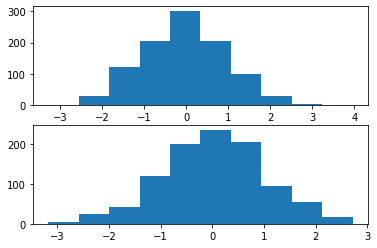

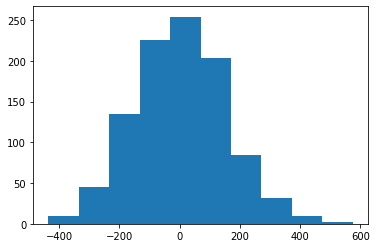

283.4382653220036

In [14]:
# #############################################################################################
# oke sudah cukup belajarnya sekarangh saatnya untuk implementasi dalam regression predictive 
from sklearn.datasets import make_regression
from matplotlib import pyplot
%matplotlib inline

# ini adalah cara generate data ujicoba dengan jumlah data 1k ada sekitar 20 features, dan 1 buah output
x, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)
pyplot.subplot(211) #211 ini adalah untuk mengatur ukurannya
pyplot.hist(x[:, 0]) #ambil semua data dari indeks pertama dari kolom
pyplot.subplot(212) # ukuran dari gambar
pyplot.hist(x[:, 1]) # ambil semua data pada kolom ke 2 dari 20 features yang ada, cuman buat FYi  
pyplot.show()
# histogram dari target variablenya, untuk output gitu
pyplot.hist(y)
pyplot.show()
y[0] # nilainya berkisar dari -400 sampai 400

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train: nan, Test: nan


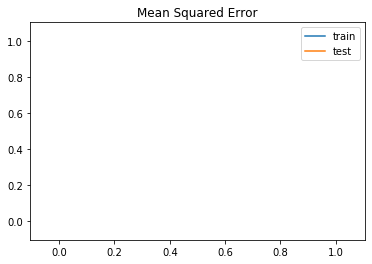

In [15]:
#################################################
# Multilayer perceptron (MLP) dengan data yang tidak discale
# mlp with unscaled data for the regression problem
from sklearn.datasets import make_regression
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot

# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)

# data dibagi antara training dan dataset
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
# input dimensinya karena ada 20 feature jadi ya 20
# satu hidden layer dengan 25 nodes kita gunakan, rectified linear activation function alias relu aktivasi
# outputnya menghasilkan satu nilai dengan aktivasi linear untuk prediksi 
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))

# compile model
# mean squared error loss function digunakan optimalisasi model dan SGD stochastic gradient descent untuk algoritma optimalisasi
# learning rate 0.01 dan momentum 0.9
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01, momentum=0.9))

# fit model
# pakai 100 epoch dengan data test untuk validasi data
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

# evaluate the model
# caranya dengan melihat dari MSE untuk tau sebagaimana baiknya model ini mempelajari problemnya
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

# plot loss during training
# ini penting untuk tahu bagaimana learningnya
pyplot.title('Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
# ?dan ternyata hasi dari MSE dari training maupun test adalah Nan yang berarti modelnya tidak bisa belajar 
# dari problem yang kita set, Model weightnya meledak karena saat training diberikan eror yang sangat besar,
# pada akhirnya SGD kebingungan menghitung weight setiap dari node
# berikutnya mari kita coba untuk kita scale outputnya, kenapa outputnya saja? 
# karena tadi kita tahu bahwa outputnya bernilai -400 sampai 400

Train: 0.003, Test: 0.010


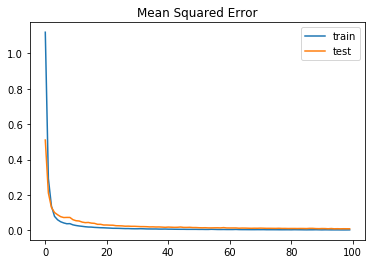

In [16]:
#################################################
# Multilayer perceptron (MLP) dengan data output dilakukan standarisasi 
# mlp with scaled data for the regression problem
from sklearn.datasets import make_regression
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler

# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)

# data dibagi antara training dan dataset
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# reshape 1d arrays to 2d arrays, pokonya harus diginiin dulu, merubah shape yang tadinya (500,) menjadi (500,1)
trainy = trainy.reshape(len(trainy), 1)
testy = testy.reshape(len(trainy), 1)
# created scaler
scaler = StandardScaler()
# fit scaler on training dataset
scaler.fit(trainy)
# transform training dataset
trainy = scaler.transform(trainy)
# transform test dataset
testy = scaler.transform(testy)
# define model

# define model
# input dimensinya karena ada 20 feature jadi ya 20
# satu hidden layer dengan 25 nodes kita gunakan, rectified linear activation function alias relu aktivasi
# outputnya menghasilkan satu nilai dengan aktivasi linear untuk prediksi 
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))

# compile model
# mean squared error loss function digunakan optimalisasi model dan SGD stochastic gradient descent untuk algoritma optimalisasi
# learning rate 0.01 dan momentum 0.9
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01, momentum=0.9))

# fit model
# pakai 100 epoch dengan data test untuk validasi data
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

# evaluate the model
# caranya dengan melihat dari MSE untuk tau sebagaimana baiknya model ini mempelajari problemnya
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

# plot loss during training
# ini penting untuk tahu bagaimana learningnya
pyplot.title('Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [17]:
# nah kali ini akhirnya model kita bisa belajar hhehe, nilai dari MSE bisa berbeda-beda kalau kita run lagi
# dalam kasus ini kita bisa tahu bahwa model kita secara cepat bisa belajar dari problem kita ini
# performa terbilang bagus karena tidak overfitting dan underfitting
#  nah berikutnya kita bikin gimana supaya efektif kodingannya
#  berikutnya kita akan bandingkan beberapa cara

>0.007
>0.003
>0.005
>0.010
>0.011
>0.007
>0.007
>0.002
>0.010
>0.005
>0.006
>0.006
>0.004
>0.006
>0.009
>0.010
>0.010
>0.009
>0.002
>0.002
>0.009
>0.005
>0.003
>0.007
>0.011
>0.005
>0.001
>0.011
>0.003
>0.002
>0.000
>0.000
>0.001
>0.000
>0.000
>0.000
>0.000
>0.002
>0.000
>0.001
>0.001
>0.000
>0.001
>0.000
>0.000
>0.000
>0.000
>0.000
>0.001
>0.001
>0.001
>0.000
>0.001
>0.002
>0.001
>0.001
>0.001
>0.000
>0.000
>0.000
>0.003
>0.006
>0.008
>0.010
>0.008
>0.005
>0.009
>0.004
>0.007
>0.003
>0.009
>0.010
>0.011
>0.003
>0.007
>0.008
>0.006
>0.010
>0.003
>0.004
>0.006
>0.005
>0.010
>0.008
>0.001
>0.004
>0.004
>0.012
>0.007
>0.006
Unscaled: 0.006 (0.003)
Normalized: 0.001 (0.000)
Standardized: 0.007 (0.003)


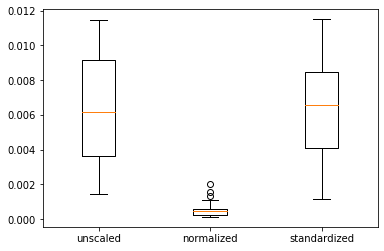

In [18]:
#################################################
# Multilayer perceptron (MLP) dengan data input dilakukan standarisasi 
# mlp with scaled data for the regression problem
# compare scaling methods for mlp inputs on regression problem
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot
from numpy import mean
from numpy import std

# prepare dataset with input and output scalers, can be none
def get_dataset(input_scaler, output_scaler):
    # generate dataset
    X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)
    # split into train and test
    n_train = 500
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainy, testy = y[:n_train], y[n_train:]
    # scale inputs
    if input_scaler is not None:
        # fit scaler
        input_scaler.fit(trainX)
        # transform training dataset
        trainX = input_scaler.transform(trainX)
        # transform test dataset
        testX = input_scaler.transform(testX)
    if output_scaler is not None:
        # reshape 1d arrays to 2d arrays
        trainy = trainy.reshape(len(trainy), 1)
        testy = testy.reshape(len(trainy), 1)
        # fit scaler on training dataset
        output_scaler.fit(trainy)
        # transform training dataset
        trainy = output_scaler.transform(trainy)
        # transform test dataset
        testy = output_scaler.transform(testy)
    return trainX, trainy, testX, testy

# fit and evaluate mse of model on test set
def evaluate_model(trainX, trainy, testX, testy):
    # define model
    model = Sequential()
    model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='linear'))
    # compile model
    model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01, momentum=0.9))
    # fit model
    model.fit(trainX, trainy, epochs=100, verbose=0)
    # evaluate the model
    test_mse = model.evaluate(testX, testy, verbose=0)
    return test_mse

# evaluate model multiple times with given input and output scalers
def repeated_evaluation(input_scaler, output_scaler, n_repeats=30):
    # get dataset dengan cara memanggil dari fungsi get_dataset
    trainX, trainy, testX, testy = get_dataset(input_scaler, output_scaler)
    # repeated evaluation of model
    results = list()
    for _ in range(n_repeats):
        # memanggil fungsi evaluate_model
        test_mse = evaluate_model(trainX, trainy, testX, testy)
        print('>%.3f' % test_mse)
        results.append(test_mse)
    return results

# unscaled inputs
results_unscaled_inputs = repeated_evaluation(None, StandardScaler())
# normalized inputs
results_normalized_inputs = repeated_evaluation(MinMaxScaler(), StandardScaler())
# standardized inputs
results_standardized_inputs = repeated_evaluation(StandardScaler(), StandardScaler())
# summarize results
print('Unscaled: %.3f (%.3f)' % (mean(results_unscaled_inputs), std(results_unscaled_inputs)))
print('Normalized: %.3f (%.3f)' % (mean(results_normalized_inputs), std(results_normalized_inputs)))
print('Standardized: %.3f (%.3f)' % (mean(results_standardized_inputs), std(results_standardized_inputs)))
# plot results
results = [results_unscaled_inputs, results_normalized_inputs, results_standardized_inputs]
labels = ['unscaled', 'normalized', 'standardized']
pyplot.boxplot(results, labels=labels)
pyplot.show()

In [ ]:
# kita sudah menjalankan beberapa gaya yaitu dibawa ini
# No scaling of inputs, standardized outputs. 0.006 (0.003)
# Normalized inputs, standardized outputs. 0.001 (0.000)
# Standardized inputs, standardized outputs. 0.007 (0.003)
#  gambar diatas menyimpulkan persebaran error dari masing2 contoh

# dari plot tersebut menunjukkan bahwa ada sedikit perbedaan antara distribusi 
# skor error untuk unscale dan standarise input variable (percobaan 1 dan 3)
# dan untuk percobaan nomor 2 menghasilkan performa yang lebih baik dan lebih ketat distribusinya skor error

# ini semua menunjukan bahwa pentingnya dari data scalling method,
